In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### We start working with h9 results

In [2]:
ch9_new=pd.read_csv('visual-H9_new.csv')
ch9_new

,time,phase1,phase2,phase3
0,0.0000,0.007870,0.000619,0.003028
1,0.0157,0.008492,0.000526,0.002775
2,0.0314,0.009136,0.000443,0.002568
3,0.0471,0.009791,0.000369,0.002408
4,0.0628,0.010447,0.000303,0.002290
...,...,...,...,...
196,3.0772,0.005265,0.001220,0.004785
197,3.0929,0.005711,0.001079,0.004402
198,3.1086,0.006195,0.000949,0.004022
199,3.1243,0.006717,0.000830,0.003659


In [3]:
ch9_new['time2pi']=ch9_new.time*2
ch9_new

,time,phase1,phase2,phase3,time2pi
0,0.0000,0.007870,0.000619,0.003028,0.0000
1,0.0157,0.008492,0.000526,0.002775,0.0314
2,0.0314,0.009136,0.000443,0.002568,0.0628
3,0.0471,0.009791,0.000369,0.002408,0.0942
4,0.0628,0.010447,0.000303,0.002290,0.1256
...,...,...,...,...,...
196,3.0772,0.005265,0.001220,0.004785,6.1544
197,3.0929,0.005711,0.001079,0.004402,6.1858
198,3.1086,0.006195,0.000949,0.004022,6.2172
199,3.1243,0.006717,0.000830,0.003659,6.2486


In [4]:
width=2*np.pi/16

In [5]:
step=np.linspace(width,2*np.pi,16)
step

array([0.39269908, 0.78539816, 1.17809725, 1.57079633, 1.96349541,
       2.35619449, 2.74889357, 3.14159265, 3.53429174, 3.92699082,
       4.3196899 , 4.71238898, 5.10508806, 5.49778714, 5.89048623,
       6.28318531])

Here the aim is to divide the interval [0,2*pi] into 16 parts so we are going to create a new dataframe with the frequencies on each interval

In [6]:
phase1=[]
phase2=[]
phase3=[]
time=[]
for st in step:
    temp=ch9_new[(ch9_new['time2pi']<st)&(ch9_new['time2pi']>st-2*np.pi/16)]
    phase1.append(temp.phase1.sum())
    phase2.append(temp.phase2.sum())
    phase3.append(temp.phase3.sum())
    time.append(st)
plot=pd.DataFrame()
plot['time']=time
plot['phase1']=phase1
plot['phase2']=phase2
plot['phase3']=phase3
plot

,time,phase1,phase2,phase3
0,0.392699,0.140307,0.002613,0.026840
1,0.785398,0.163001,0.000574,0.014136
2,1.178097,0.144364,0.007571,0.000834
3,1.570796,0.201841,0.035240,0.003041
4,1.963495,0.150021,0.053963,0.026909
5,2.356194,0.058599,0.047764,0.046367
6,2.748894,0.012720,0.057158,0.043053
7,3.141593,0.004163,0.067314,0.091201
8,3.534292,0.000223,0.035695,0.096081
9,3.926991,0.001677,0.058113,0.087836


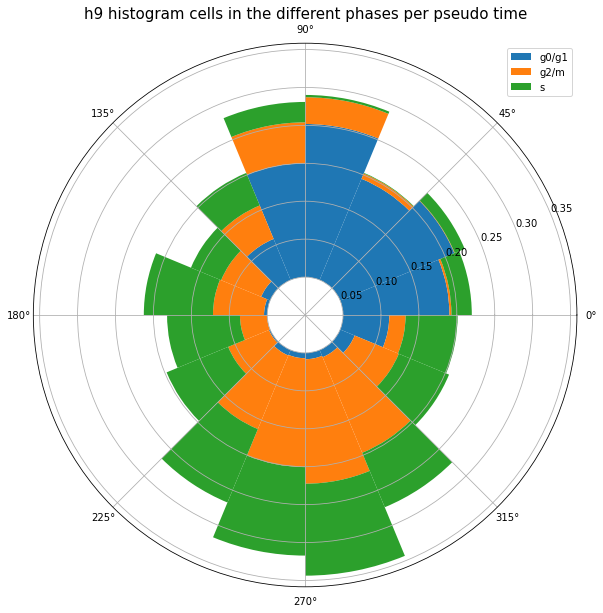

In [7]:
theta=plot['time']-width/2 #width/2 works to correct the histogram
radii0=plot['phase1'].values
radii2=plot['phase2'].values
radiis=plot['phase3'].values
fig, axe=plt.subplots(1,1,figsize=(10,10))
ax = plt.subplot(111, polar=True)
ax.bar(theta, radii0, width=width, bottom=0.05, label='g0/g1')
ax.bar(theta, radii2, width=width, bottom=0.05+radii0, label='g2/m')
ax.bar(theta, radiis, width=width, bottom=0.05+radii0+radii2, label='s')
plt.legend(loc="upper right")
plt.title('h9 histogram cells in the different phases per pseudo time',size=15)
plt.show()

### Working with the MB results

In [8]:
MB=pd.read_csv('visual-MB_new.csv')
MB

,time,phase1,phase2,phase3
0,0.0000,0.003999,0.007249,0.000336
1,0.0157,0.003691,0.006963,0.000257
2,0.0314,0.003354,0.006689,0.000191
3,0.0471,0.003009,0.006421,0.000138
4,0.0628,0.002674,0.006150,0.000098
...,...,...,...,...
196,3.0772,0.004626,0.008799,0.000859
197,3.0929,0.004644,0.008507,0.000752
198,3.1086,0.004590,0.008191,0.000640
199,3.1243,0.004461,0.007869,0.000530


In [9]:
MB['time2pi']=MB.time*2
MB

,time,phase1,phase2,phase3,time2pi
0,0.0000,0.003999,0.007249,0.000336,0.0000
1,0.0157,0.003691,0.006963,0.000257,0.0314
2,0.0314,0.003354,0.006689,0.000191,0.0628
3,0.0471,0.003009,0.006421,0.000138,0.0942
4,0.0628,0.002674,0.006150,0.000098,0.1256
...,...,...,...,...,...
196,3.0772,0.004626,0.008799,0.000859,6.1544
197,3.0929,0.004644,0.008507,0.000752,6.1858
198,3.1086,0.004590,0.008191,0.000640,6.2172
199,3.1243,0.004461,0.007869,0.000530,6.2486


Here the aim is to divide the interval [0,2*pi] into 16 parts so we are going to create a new dataframe with the frequencies on each interval

In [10]:
phase1=[]
phase2=[]
phase3=[]
time=[]
for st in step:
    temp=MB[(MB['time2pi']<st)&(MB['time2pi']>st-2*np.pi/16)]
    phase1.append(temp.phase1.sum())
    phase2.append(temp.phase2.sum())
    phase3.append(temp.phase3.sum())
    time.append(st)
plot=pd.DataFrame()
plot['time']=time
plot['phase1']=phase1
plot['phase2']=phase2
plot['phase3']=phase3
plot

,time,phase1,phase2,phase3
0,0.392699,0.028034,0.063348,0.000867
1,0.785398,0.054430,0.031953,0.000330
2,1.178097,0.115562,0.051739,0.005508
3,1.570796,0.209292,0.060836,0.011994
4,1.963495,0.176520,0.043803,0.014488
5,2.356194,0.096305,0.030655,0.034581
6,2.748894,0.035236,0.008064,0.098608
7,3.141593,0.009774,0.000256,0.184205
8,3.534292,0.003991,0.000237,0.190845
9,3.926991,0.008300,0.008363,0.161171


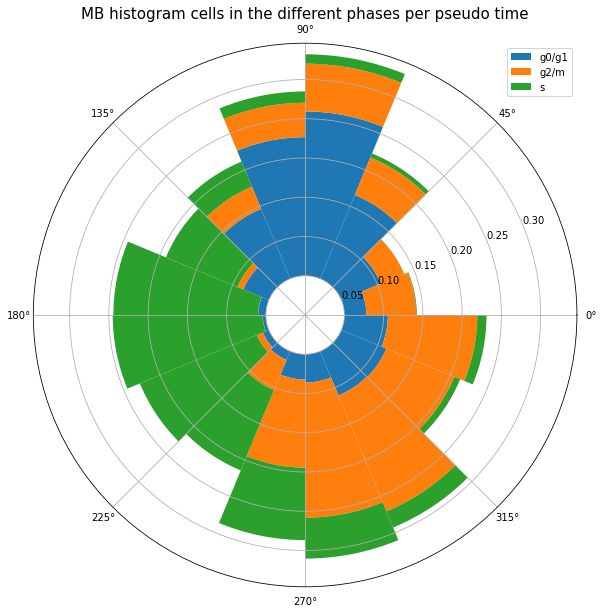

In [11]:
theta=plot['time']-width/2 #width/2 works to correct the histogram
radii0=plot['phase1'].values
radii2=plot['phase2'].values
radiis=plot['phase3'].values
fig, axe=plt.subplots(1,1,figsize=(10,10))
ax = plt.subplot(111, polar=True)
ax.bar(theta, radii0, width=width, bottom=0.05, label='g0/g1')
ax.bar(theta, radii2, width=width, bottom=0.05+radii0, label='g2/m')
ax.bar(theta, radiis, width=width, bottom=0.05+radii0+radii2, label='s')
plt.legend(loc="upper right")
plt.title('MB histogram cells in the different phases per pseudo time',size=15)
plt.show()

### Working with pc3

In [12]:
pc3=pd.read_csv('visual-pc3_new.csv')
pc3

,time,phase1,phase2,phase3
0,0.0000,0.014292,0.001816,0.001451
1,0.0157,0.014563,0.001900,0.001229
2,0.0314,0.014855,0.001994,0.001017
3,0.0471,0.015147,0.002090,0.000822
4,0.0628,0.015418,0.002182,0.000650
...,...,...,...,...
196,3.0772,0.013669,0.001743,0.002357
197,3.0929,0.013675,0.001704,0.002240
198,3.1086,0.013743,0.001691,0.002081
199,3.1243,0.013872,0.001706,0.001889


In [13]:
pc3['time2pi']=pc3.time*2
pc3

,time,phase1,phase2,phase3,time2pi
0,0.0000,0.014292,0.001816,0.001451,0.0000
1,0.0157,0.014563,0.001900,0.001229,0.0314
2,0.0314,0.014855,0.001994,0.001017,0.0628
3,0.0471,0.015147,0.002090,0.000822,0.0942
4,0.0628,0.015418,0.002182,0.000650,0.1256
...,...,...,...,...,...
196,3.0772,0.013669,0.001743,0.002357,6.1544
197,3.0929,0.013675,0.001704,0.002240,6.1858
198,3.1086,0.013743,0.001691,0.002081,6.2172
199,3.1243,0.013872,0.001706,0.001889,6.2486


In [14]:
phase1=[]
phase2=[]
phase3=[]
time=[]
for st in step:
    temp=pc3[(pc3['time2pi']<st)&(pc3['time2pi']>st-2*np.pi/16)]
    phase1.append(temp.phase1.sum())
    phase2.append(temp.phase2.sum())
    phase3.append(temp.phase3.sum())
    time.append(st)
plot=pd.DataFrame()
plot['time']=time
plot['phase1']=phase1
plot['phase2']=phase2
plot['phase3']=phase3
plot

,time,phase1,phase2,phase3
0,0.392699,0.184298,0.028403,0.005481
1,0.785398,0.133806,0.056855,0.003948
2,1.178097,0.042227,0.120278,0.003436
3,1.570796,0.012238,0.219513,0.004916
4,1.963495,0.012283,0.225605,0.015829
5,2.356194,0.003783,0.153840,0.041116
6,2.748894,0.005197,0.080394,0.048417
7,3.141593,0.005809,0.032548,0.121856
8,3.534292,0.000410,0.007107,0.182123
9,3.926991,0.000114,0.000800,0.190731


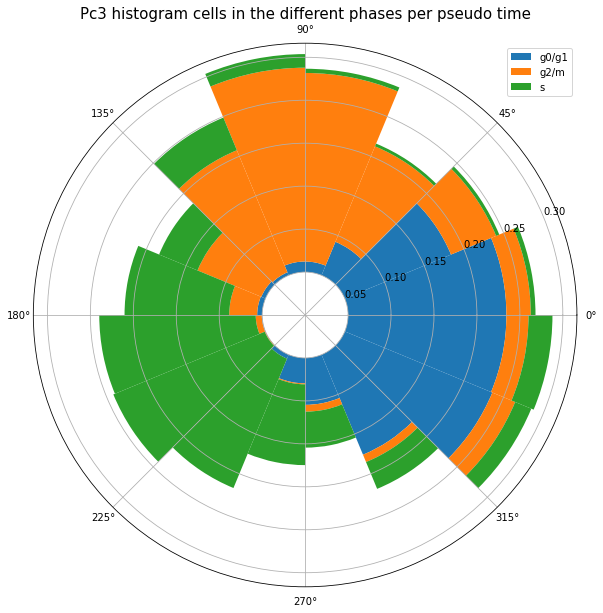

In [15]:
theta=plot['time']-width/2 #width/2 works to correct the histogram
radii0=plot['phase1'].values
radii2=plot['phase2'].values
radiis=plot['phase3'].values
fig, axe=plt.subplots(1,1,figsize=(10,10))
ax = plt.subplot(111, polar=True)
ax.bar(theta, radii0, width=width, bottom=0.05, label='g0/g1')
ax.bar(theta, radii2, width=width, bottom=0.05+radii0, label='g2/m')
ax.bar(theta, radiis, width=width, bottom=0.05+radii0+radii2, label='s')
plt.legend(loc="upper right")
plt.title('Pc3 histogram cells in the different phases per pseudo time',size=15)
plt.show()

Finish with CHLA dataset

In [16]:
ch=pd.read_csv('visual-chla.csv')
ch

,time
0,2.124480
1,1.190276
2,0.123449
3,0.063776
4,2.598410
...,...
9997,2.160520
9998,2.106907
9999,1.893408
10000,0.790774


In [18]:
ch['time2pi']=ch.time*2
ch

,time,time2pi
0,2.124480,4.248960
1,1.190276,2.380553
2,0.123449,0.246897
3,0.063776,0.127551
4,2.598410,5.196820
...,...,...
9997,2.160520,4.321041
9998,2.106907,4.213814
9999,1.893408,3.786817
10000,0.790774,1.581547


In [19]:
total=10002
count=[]
time=[]
for st in step:
    temp=ch[(ch['time2pi']<st)&(ch['time2pi']>st-2*np.pi/16)]
    count.append(len(temp)/total)
    time.append(st)
plot=pd.DataFrame()
plot['time']=time
plot['freq']=count
plot

,time,freq
0,0.392699,0.073285
1,0.785398,0.064087
2,1.178097,0.052490
3,1.570796,0.050690
4,1.963495,0.044991
5,2.356194,0.044791
6,2.748894,0.050790
7,3.141593,0.054689
8,3.534292,0.060588
9,3.926991,0.062787


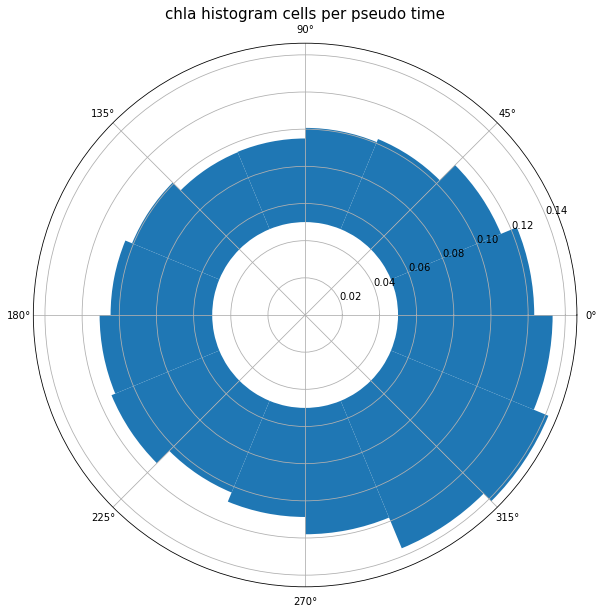

In [21]:
theta=plot['time']-width/2 #width/2 works to correct the histogram
radii=plot['freq'].values
fig, axe=plt.subplots(1,1,figsize=(10,10))
ax = plt.subplot(111, polar=True)
ax.bar(theta, radii, width=width, bottom=0.05)
plt.title('chla histogram cells per pseudo time',size=15)
plt.show()